### Importing necessary libraries

In [947]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [948]:
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [949]:

# fetch dataset 
adult = fetch_ucirepo(id=2)
  
df = adult['data']['original']


In [950]:
adult

{'data': {'ids': None,
  'features':        age         workclass  fnlwgt  education  education-num  \
  0       39         State-gov   77516  Bachelors             13   
  1       50  Self-emp-not-inc   83311  Bachelors             13   
  2       38           Private  215646    HS-grad              9   
  3       53           Private  234721       11th              7   
  4       28           Private  338409  Bachelors             13   
  ...    ...               ...     ...        ...            ...   
  48837   39           Private  215419  Bachelors             13   
  48838   64               NaN  321403    HS-grad              9   
  48839   38           Private  374983  Bachelors             13   
  48840   44           Private   83891  Bachelors             13   
  48841   35      Self-emp-inc  182148  Bachelors             13   
  
             marital-status         occupation    relationship  \
  0           Never-married       Adm-clerical   Not-in-family   
  1      Marri

### Learn about data distribution in the dataset

In [951]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [952]:
df.shape

(48842, 15)

In [953]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [954]:
missing_values = df.isnull().sum()
missing_values

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [955]:
df.fillna('NaN', inplace=True)

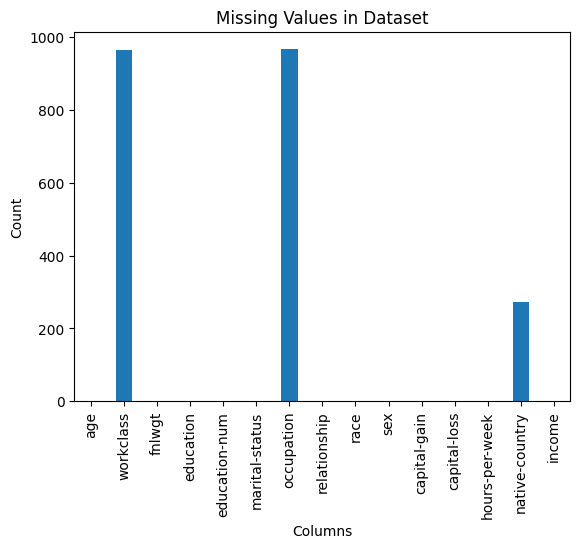

In [956]:
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.title('Missing Values in Dataset')
plt.show()

### Value counts in missing value classes

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
NaN                   963
Without-pay            21
Never-worked           10
Name: count, dtype: int64


<Axes: xlabel='workclass'>

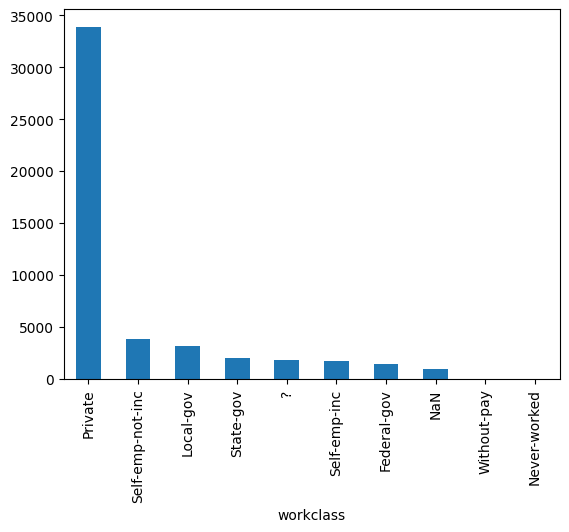

In [957]:
print(df['workclass'].value_counts())
df['workclass'].value_counts().plot(kind='bar')

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
?                    1843
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
NaN                   966
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


<Axes: xlabel='occupation'>

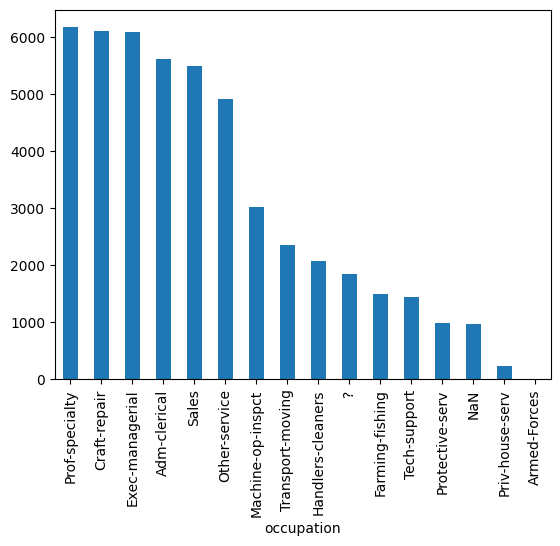

In [958]:
print(df['occupation'].value_counts())
df['occupation'].value_counts().plot(kind='bar')

native-country
United-States                 43832
Mexico                          951
?                               583
Philippines                     295
NaN                             274
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua    

<Axes: xlabel='native-country'>

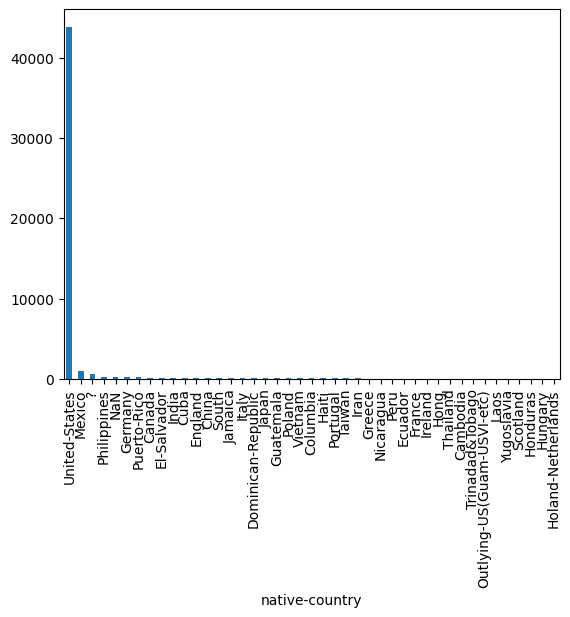

In [959]:
print(df['native-country'].value_counts())
df['native-country'].value_counts().plot(kind='bar')

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64


<Axes: xlabel='income'>

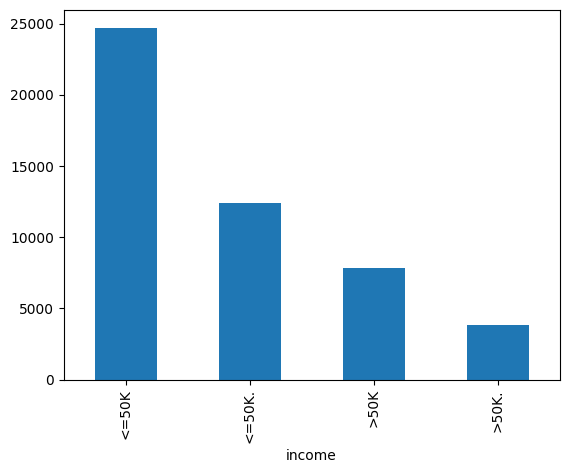

In [960]:
print(df['income'].value_counts())
df['income'].value_counts().plot(kind='bar')

In [961]:
df['income'] = df['income'].str.replace('.', '')
print(df['income'].value_counts())

income
<=50K    37155
>50K     11687
Name: count, dtype: int64


### Replace null values with NaN


In [962]:
import pandas as pd

def get_column_mode(df, column_name):
    mode_value = df[column_name].mode().values[0]
    return mode_value


In [963]:
df['workclass']=df['workclass'].replace(['?','NaN'], get_column_mode(df, 'workclass'))
df['workclass'].value_counts()

workclass
Private             36705
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [964]:
df['occupation']=df['occupation'].replace(['?','NaN'], get_column_mode(df, 'occupation'))
df['occupation'].value_counts()

occupation
Prof-specialty       8981
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [965]:
df['native-country']=df['native-country'].replace(['?','NaN'], get_column_mode(df, 'native-country'))
df['native-country'].value_counts()

native-country
United-States                 44689
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador      

In [966]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [967]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Value counts for feature classes


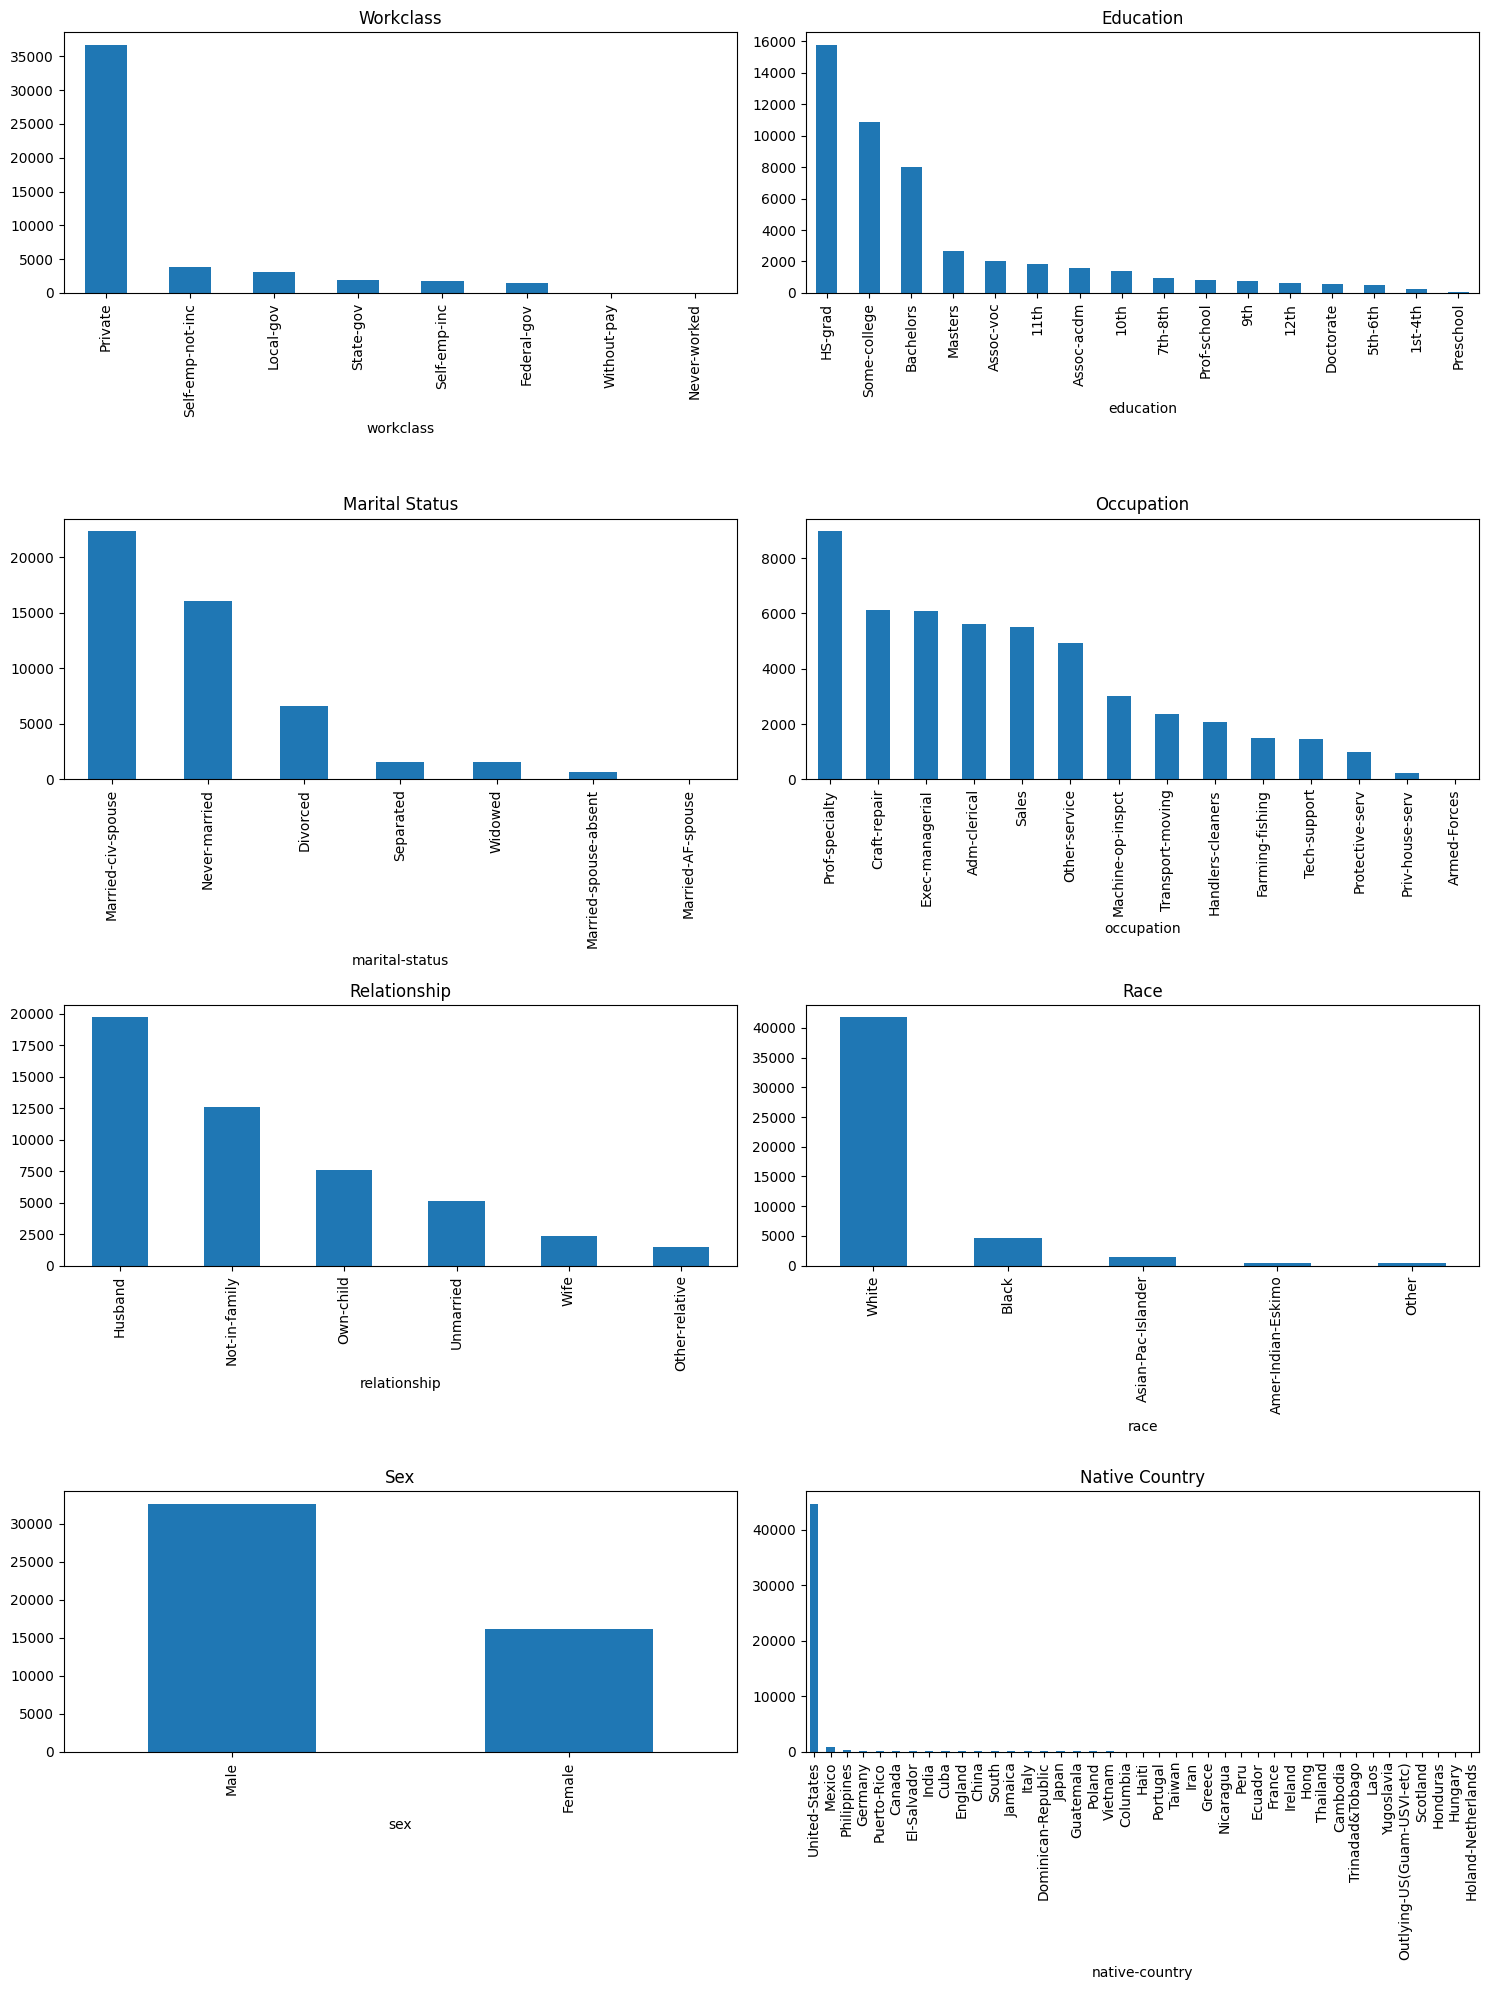

In [968]:
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

axs = axs.flatten()

df['workclass'].value_counts().plot(kind='bar', ax=axs[0], title='Workclass')
df['education'].value_counts().plot(kind='bar', ax=axs[1], title='Education')
df['marital-status'].value_counts().plot(kind='bar', ax=axs[2], title='Marital Status')
df['occupation'].value_counts().plot(kind='bar', ax=axs[3], title='Occupation')
df['relationship'].value_counts().plot(kind='bar', ax=axs[4], title='Relationship')
df['race'].value_counts().plot(kind='bar', ax=axs[5], title='Race')
df['sex'].value_counts().plot(kind='bar', ax=axs[6], title='Sex')
df['native-country'].value_counts().plot(kind='bar', ax=axs[7], title='Native Country')

plt.tight_layout()
plt.show()

### Correlation Analysis

In [969]:
from sklearn.preprocessing import LabelEncoder

encoded_df = df.copy()

categorical_columns = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])

encoded_df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,215419,9,13,0,9,1,4,0,0,0,36,38,0
48838,64,3,321403,11,9,6,9,2,2,1,0,0,40,38,0
48839,38,3,374983,9,13,2,9,0,4,1,0,0,50,38,0
48840,44,3,83891,9,13,0,0,3,1,1,5455,0,40,38,0


In [970]:
corr = encoded_df.corr()
corr

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.045643,-0.076628,-0.015058,0.030940,-0.263978,-0.000133,-0.263383,0.028421,0.088120,0.077229,0.056944,0.071558,-0.002622,0.230369
workclass,0.045643,1.000000,-0.026519,0.005219,0.007333,-0.020870,0.009841,-0.056073,0.053923,0.066672,0.031558,0.004168,0.042845,-0.004829,-0.000511
fnlwgt,-0.076628,-0.026519,1.000000,-0.022570,-0.038761,0.029851,-0.002253,0.009092,-0.027062,0.027739,-0.003706,-0.004366,-0.013519,-0.058534,-0.006339
education,-0.015058,0.005219,-0.022570,1.000000,0.359668,-0.037417,-0.035126,-0.010758,0.013250,-0.027041,0.028928,0.017638,0.057659,0.075339,0.080091
education-num,0.030940,0.007333,-0.038761,0.359668,1.000000,-0.069992,0.072706,-0.090534,0.029239,0.009328,0.125146,0.080972,0.143689,0.090137,0.332613
marital-status,-0.263978,-0.020870,0.029851,-0.037417,-0.069992,1.000000,0.030445,0.187800,-0.070104,-0.127479,-0.043969,-0.033872,-0.185567,-0.017919,-0.199072
occupation,-0.000133,0.009841,-0.002253,-0.035126,0.072706,0.030445,1.000000,-0.034964,-0.005210,0.042579,0.014518,0.011082,-0.015550,-0.001577,0.032550
relationship,-0.263383,-0.056073,0.009092,-0.010758,-0.090534,0.187800,-0.034964,1.000000,-0.117041,-0.579797,-0.056510,-0.057201,-0.250400,-0.006999,-0.253214
race,0.028421,0.053923,-0.027062,0.013250,0.029239,-0.070104,-0.005210,-0.117041,1.000000,0.086734,0.011581,0.018595,0.039694,0.117553,0.070934
sex,0.088120,0.066672,0.027739,-0.027041,0.009328,-0.127479,0.042579,-0.579797,0.086734,1.000000,0.047094,0.045480,0.228560,-0.002453,0.214628


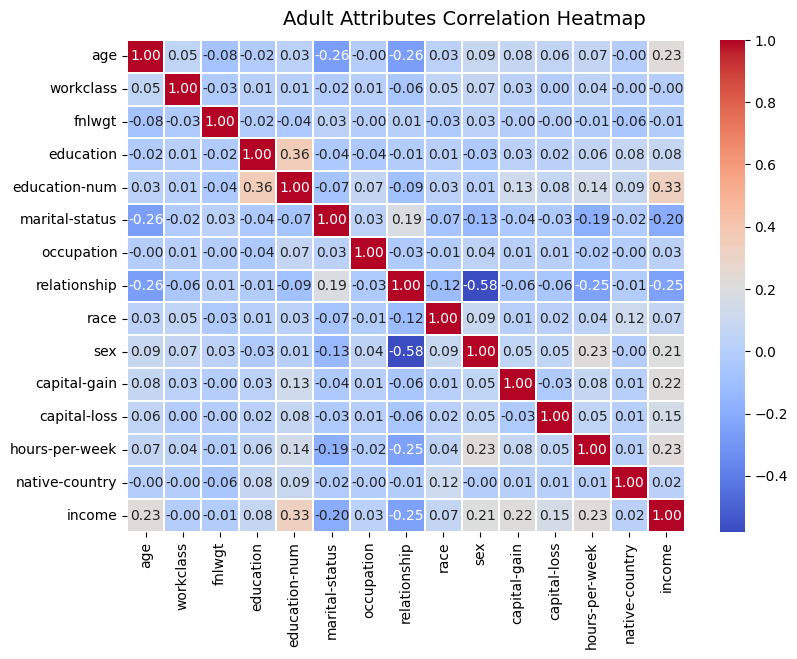

In [971]:
f, ax = plt.subplots(figsize=(9, 6))
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm", fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Adult Attributes Correlation Heatmap', fontsize=14)

In [972]:
encoded_df.drop('fnlwgt', axis=1, inplace=True)
encoded_df.drop('education', axis=1, inplace=True)
#encoded_df.drop('marital-status', axis=1, inplace=True)
#encoded_df.drop('relationship', axis=1, inplace=True)

encoded_df

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,13,0,4,1,2174,0,40,38,0
1,50,5,13,3,4,1,0,0,13,38,0
2,38,3,9,5,4,1,0,0,40,38,0
3,53,3,7,5,2,1,0,0,40,38,0
4,28,3,13,9,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,3,13,9,4,0,0,0,36,38,0
48838,64,3,9,9,2,1,0,0,40,38,0
48839,38,3,13,9,4,1,0,0,50,38,0
48840,44,3,13,0,1,1,5455,0,40,38,0


### Preprocessing data

In [973]:
x = encoded_df.drop(['income'], axis = 1)
y = encoded_df['income']

In [982]:
x

,age,workclass,education-num,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,13,0,4,1,2174,0,40,38
1,50,5,13,3,4,1,0,0,13,38
2,38,3,9,5,4,1,0,0,40,38
3,53,3,7,5,2,1,0,0,40,38
4,28,3,13,9,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...
48837,39,3,13,9,4,0,0,0,36,38
48838,64,3,9,9,2,1,0,0,40,38
48839,38,3,13,9,4,1,0,0,50,38
48840,44,3,13,0,1,1,5455,0,40,38


In [974]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [975]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()


Naive Bayes Classifier:

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.96      0.88      7452
           1       0.69      0.31      0.43      2317

    accuracy                           0.80      9769
   macro avg       0.75      0.63      0.65      9769
weighted avg       0.79      0.80      0.77      9769



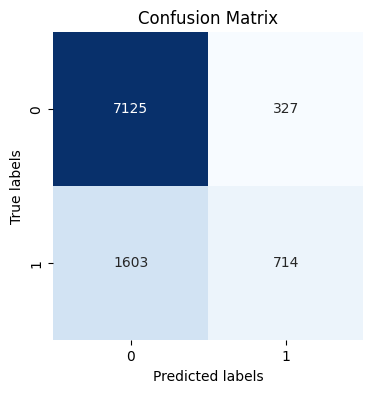

Accuracy Score: 80.24362780223156


In [976]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = nb.predict(x_test)
print('\nNaive Bayes Classifier:')
print('\nClassification Report')
print(classification_report(y_test,y_pred))
cf = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print('Accuracy Score:',accuracy_score(y_test,y_pred)*100)

In [977]:
# Training score
train_score = nb.score(x_train, y_train)
print("Training Score:", train_score)

# Testing score
test_score = nb.score(x_test, y_test)
print("Testing Score:", test_score)

# Difference between training and testing scores
score_difference = train_score - test_score
print("Difference between Training and Testing Scores:", score_difference)

Training Score: 0.7955365597727331
Testing Score: 0.8024362780223155
Difference between Training and Testing Scores: -0.006899718249582465


In [978]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()


Random Forest Classifier:

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7452
           1       0.67      0.55      0.60      2317

    accuracy                           0.83      9769
   macro avg       0.77      0.73      0.75      9769
weighted avg       0.82      0.83      0.82      9769



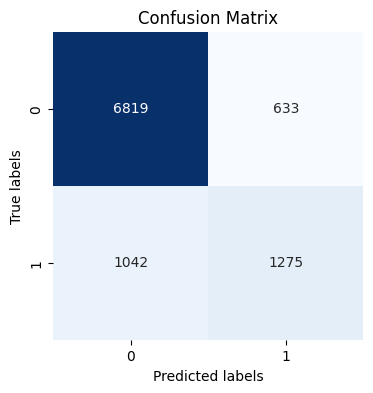

Accuracy Score: 82.85392568328386


In [979]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = rf.predict(x_test)
print('\nRandom Forest Classifier:')
print('\nClassification Report')
print(classification_report(y_test,y_pred))
cf = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
print('Accuracy Score:',accuracy_score(y_test,y_pred)*100)

In [980]:
# Training score
train_score = rf.score(x_train, y_train)
print("Training Score:", train_score)

# Testing score
test_score = rf.score(x_test, y_test)
print("Testing Score:", test_score)

# Difference between training and testing scores
score_difference = train_score - test_score
print("Difference between Training and Testing Scores:", score_difference)

Training Score: 0.9587694827630333
Testing Score: 0.8285392568328386
Difference between Training and Testing Scores: 0.13023022593019473


### Optimizing Models

In [981]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
}

# Create the random forest classifier
rf = RandomForestClassifier()

# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x, y)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Train the model with the best hyperparameters
best_rf.fit(x_train, y_train)

# Evaluate the model on the training and testing data
train_score = best_rf.score(x_train, y_train)
test_score = best_rf.score(x_test, y_test)

print("Training Accuracy:", train_score)
print("Testing Accuracy:", test_score)


Training Accuracy: 0.8544519233230108
Testing Accuracy: 0.8476814412938888
